In [1]:
#import lib
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#DATA COLLECTION AND PROCESSING
#LOADING DATA FRAME
data=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")


In [3]:
#inspecting the dataset
data.head()  #for first 5 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#check null values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
#checking the distribution of categorical data
print(data.fueltype.value_counts())
print(data.aspiration.value_counts())
print(data.doornumber.value_counts())
print(data.carbody.value_counts())
print(data.drivewheel	.value_counts())
print(data.enginelocation.value_counts())
print(data.enginetype.value_counts())
print(data.cylindernumber.value_counts())
print(data.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [8]:
#encoding 'fueltype' Column
data.replace({'fueltype':{'gas':1,'diesel':2}},inplace=True)

#encoding 'aspiration' Column
data.replace({'aspiration':{'std':1,'turbo':2}},inplace=True)

#encoding 'doornumber' Column
data.replace({'doornumber':{'four':1,'two':2}},inplace=True)

#encoding 'carbody' Column
data.replace({'carbody':{'sedan':1,'hatchback':2,'wagon':3,'hardtop':4,'convertible':5}},inplace=True)

#encoding 'drivewheel' Column
data.replace({'drivewheel':{'fwd':1,'rwd':2,'4wd':3}},inplace=True)

#encoding 'enginelocation' Column
data.replace({'enginelocation':{'front':1,'rear':2}},inplace=True)

#encoding 'enginetype' Column
data.replace({'enginetype':{'ohc':1,'ohcf':2,'ohcv':3,'dohc':4,'l':5,'rotor':6,'dohcv':7}},inplace=True)

data.replace({'cylindernumber':{'four':1,'six':2,'five':3,'eight':4,'two':5,'three':6,'twelve':7}},inplace=True)

#encoding 'fuelsystem' Column
data.replace({'fuelsystem':{'mpfi':1,'2bbl':2,'idi':3,'1bbl':4,'spdi':5,'4bbl':6,'mfi':7,'spfi':8}},inplace=True)

In [9]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,2,5,2,1,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,2,5,2,1,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,2,2,2,1,94.5,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,1,1,1,1,99.8,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,1,1,3,1,99.4,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0


Splitting the data and target

In [10]:
X=data.drop(['CarName','price'],axis=1)
Y=data['price']

In [11]:
print(X)

     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         1           1           2        5           2   
1         2          3         1           1           2        5           2   
2         3          1         1           1           2        2           2   
3         4          2         1           1           1        1           1   
4         5          2         1           1           1        1           3   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         1           1           1        1           2   
201     202         -1         1           2           1        1           2   
202     203         -1         1           1           1        1           2   
203     204         -1         2           2           1        1           2   
204     205         -1         1           2           1        1           2   

     enginelocation  wheelb

In [12]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


Splitting Training data and Test Data

In [13]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [14]:
#Model training

# 1.Linear Regression
#loading the Linear Regression Model
lin_reg_model=LinearRegression()

In [15]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [16]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [17]:
# R square Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.9027674914273751


Visualize the actual prices and predicted price

Text(0.5, 1.0, 'Actual vs Predicted Price')

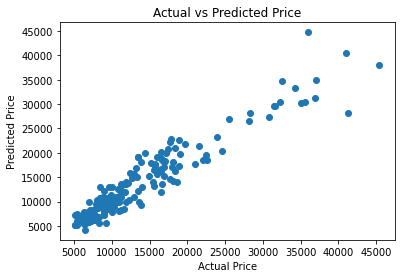

In [18]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")

In [19]:
#prediction on training data
test_data_prediction = lin_reg_model.predict(X_test)

In [20]:
# R square Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.9401935025631383


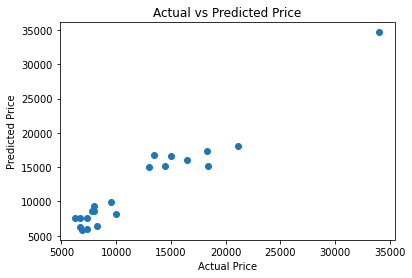

In [21]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

2.Lasso Regression

In [22]:
#loading the Lasso Regression Model
lass_reg_model=Lasso()

In [23]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [24]:
#prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [25]:
# R square Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.9027478748416464


Visualize the actual prices and predicted price

Text(0.5, 1.0, 'Actual vs Predicted Price')

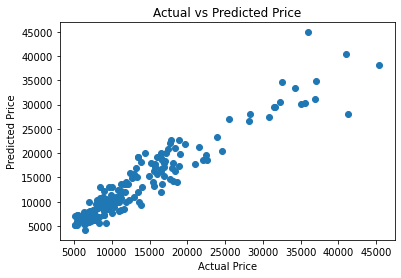

In [26]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")

In [27]:
#prediction on training data
test_data_prediction = lass_reg_model.predict(X_test)

In [28]:
# R square Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.940232536970269


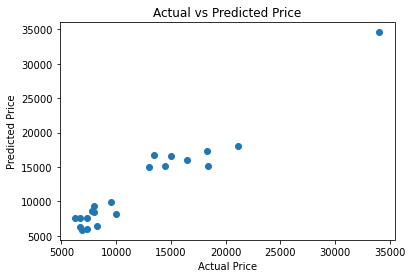

In [29]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()